In [7]:
import dataset
import numpy as np
import matplotlib.pyplot as plt

db = dataset.connect('sqlite:///barsave.db')

estimators = {}

for row in db.query('select name, score from estimators'):
    key = row.get('name')
    val = row.get('score')
    key_arr = key.split('_')
    ins = key_arr[0] + '_' + key_arr[1]
    typ = key_arr[2]
    if ins in estimators.keys():
        estimators[ins][typ] = val
    else:
        estimators[ins] = { typ: val }
    
estimators

{'AU200_AUD': {'close': 0.21207763970983673,
  'high': 0.24741888555869299,
  'low': 0.27027876968564035,
  'open': 0.39467494646066364,
  'vol': -2.1762441785935747},
 'AUD_CAD': {'close': 0.6739157789922324,
  'high': 0.7599990418283263,
  'low': 0.7629320501773939,
  'open': 0.8563041050017111,
  'vol': -0.059434765538234124},
 'AUD_CHF': {'close': 0.4344144478679765,
  'high': 0.571363942822282,
  'low': 0.47000791962738503,
  'open': 0.7389431308505765,
  'vol': -0.1524522098717723},
 'AUD_HKD': {'close': 0.5914271364058118,
  'high': 0.7330640184236228,
  'low': 0.6675473441056622,
  'open': 0.8461082916849242,
  'vol': 0.015282185954809383},
 'AUD_JPY': {'close': -0.8370699990095686,
  'high': 0.14117718908909463,
  'low': -0.14908331819348186,
  'open': 0.3289112948390584,
  'vol': -0.18969850414735426},
 'AUD_NZD': {'close': 0.7112007228312948,
  'high': 0.7342903995172119,
  'low': 0.8241483751181992,
  'open': 0.9042379132641057,
  'vol': -0.12213066019996759},
 'AUD_SGD': {

In [6]:
ope = []
clo = []
hig = []
low = []
vol = []
for key in estimators.keys():
    ope.append(estimators[key].get('open'))
    hig.append(estimators[key].get('high'))
    low.append(estimators[key].get('low'))
    clo.append(estimators[key].get('close'))
    vol.append(estimators[key].get('vol'))
len(ope)

124

Current size: [18, 12]


{'whiskers': [<matplotlib.lines.Line2D at 0xc665730>,
 'caps': [<matplotlib.lines.Line2D at 0xc665c30>,
 'boxes': [<matplotlib.lines.Line2D at 0xc6654b0>,
 'medians': [<matplotlib.lines.Line2D at 0xc665fb0>,
 'fliers': [<matplotlib.lines.Line2D at 0xc66d3f0>,
 'means': []}

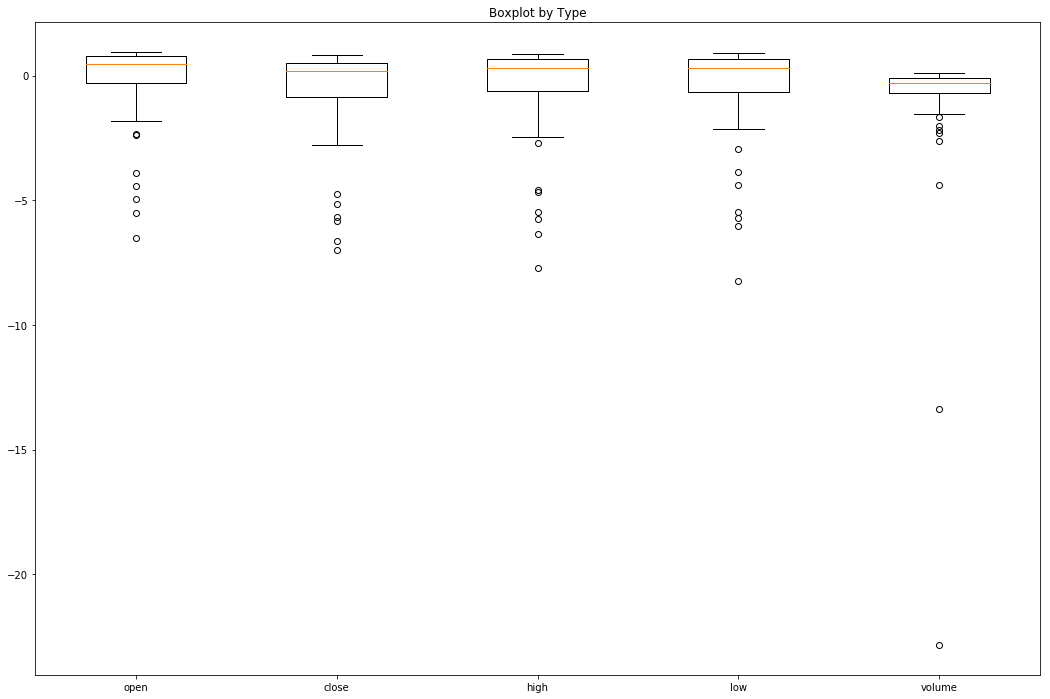

In [14]:
fig1, ax1 = plt.subplots()
fig_size = plt.rcParams["figure.figsize"]
print("Current size: " + str(fig_size))
fig_size[0] = 18
fig_size[1] = 12
ax1.set_title('Boxplot by Type')
ax1.boxplot([ope, clo, hig, low, vol], labels = ['open', 'close', 'high', 'low', 'volume'])
# Get current size
#plt.rcParams["figure.figsize"] = fig_size

In [16]:
vlist = []
for key in estimators.keys():
    r2 = estimators[key].get('open')
    r2 += estimators[key].get('close')
    r2 += estimators[key].get('high')
    r2 += estimators[key].get('low')
    r2 += estimators[key].get('vol')
    vlist.append({'ins': key, 'r2': r2})
    
vlist = sorted(vlist, key = lambda x: x.get('r2'), reverse = True)

for line in vlist:
    print(line.get('ins') + ' -- ' + str(line.get('r2')))

NZD_HKD -- 3.4256099532377435
CAD_SGD -- 3.421949556452395
XAU_CAD -- 3.3969803374569465
CAD_CHF -- 3.2411544898705897
GBP_CHF -- 3.2045089534278346
NZD_USD -- 3.1941106354020716
XAU_SGD -- 3.0913289582190235
GBP_CAD -- 3.078418746142668
AUD_NZD -- 3.051746750530844
USD_ZAR -- 3.050856513731541
AUD_CAD -- 2.9937162104614297
GBP_ZAR -- 2.957314652248027
SGD_CHF -- 2.902514289961596
USD_NOK -- 2.875287962586367
CHF_ZAR -- 2.8704476392887965
AUD_HKD -- 2.8534289765748304
GBP_SGD -- 2.8472332799314
NATGAS_USD -- 2.84272333241371
XAU_GBP -- 2.823913829986342
EUR_ZAR -- 2.814823211127575
AUD_USD -- 2.8012262566287056
CAD_JPY -- 2.7379827680236066
XAU_CHF -- 2.730918500099862
USD_JPY -- 2.7101945247240398
NZD_SGD -- 2.7042628664419994
XAU_AUD -- 2.5292255617936106
XAU_USD -- 2.4918758704762727
HKD_JPY -- 2.4334643735615504
NZD_CHF -- 2.426348791965211
ZAR_JPY -- 2.426179325521887
CHF_JPY -- 2.4137205106441915
XPT_USD -- 2.4078571879488395
USD_CHF -- 2.392522693034508
XAU_HKD -- 2.357864511873